In [1]:
## file for video segmentation using prompt

In [1]:
from mb_annotation.utils import video_to_images

In [2]:
image_list = video_to_images(video_path="./test_data/test_video.mp4",image_save_path="./test_data/video_images",image_name="0",
                             frame_interval=1,duration=7,image_format="jpg");

Converting video to images:   0%|          | 0/773 [00:00<?, ?it/s]

Converting video to images:  27%|██▋       | 211/773 [00:06<00:18, 30.61it/s]

Video duration reached
Total frames: 773
Current frame: 211
Current time: 7.033333333333333


In [16]:
## finding bounding box of item

In [17]:
from mb_annotation.bounding_box import google_model,generate_bounding_box,add_bounding_box
from mb_annotation.utils import load_env_file
import os

load_env_file('./env');
model = google_model(model="gemini-1.5-pro-latest",api_key=os.environ.get("GOOGLE_API_KEY"))


/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
res =generate_bounding_box(model,image_path="./test_data/video_images/0_0005.jpg",prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]')

In [41]:
res.text

'{\n  "container": [5,73,994,949]\n}\n'

In [42]:
import json
if type(res) != dict:
    try:
        res = json.loads(res.text)
    except:
        res = eval(res.text)
print(res)

{'container': [5, 73, 994, 949]}


In [43]:
img_bb,value = add_bounding_box(image_path="./test_data/video_images/0_0005.jpg",bounding_box=res,label="container",box_resize=True,show=False)
print(value)

[5, 140, 1073, 1822]


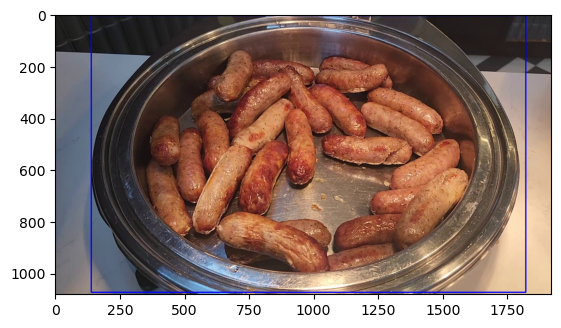

In [44]:
import matplotlib.pyplot as plt
plt.imshow(img_bb)
plt.show()

In [6]:
## sam2 video predictor

In [1]:
from mb_annotation.sam2 import video_predictor

/home/malav/.local/lib/python3.11/site-packages/sam2/modeling/sam/transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


In [2]:
model_cfg= './sam2_hiera_s.yaml'
sam2_checkpoint = '/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt'
test_vp = video_predictor(model_cfg,sam2_checkpoint,device='cpu')

In [3]:
test_vp.inference_state(video_image_folder='./test_data/video_images')

frame loading (JPEG): 100%|██████████| 205/205 [00:07<00:00, 27.62it/s]


points : [[ 250.  600.]
 [1000.  700.]]
labels : [1 0]
bbox : [ 140.    5. 1822. 1073.]


/home/malav/.local/lib/python3.11/site-packages/sam2/sam2_video_predictor.py:873: UserWarning: cannot import name '_C' from 'sam2' (/home/malav/.local/lib/python3.11/site-packages/sam2/__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/segment-anything-2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(


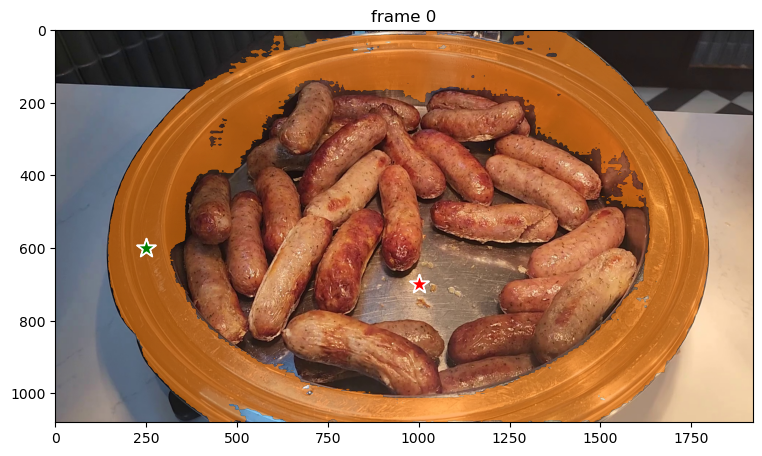

In [4]:
test_vp.predict_item(bbox=[ 140,5,1822,1073],points=[[250, 600],[1000,700]],labels=[1,0]) ## the bbox cordinates are different from google gemini output. check order

propagate in video: 100%|██████████| 205/205 [11:19<00:00,  3.32s/it]


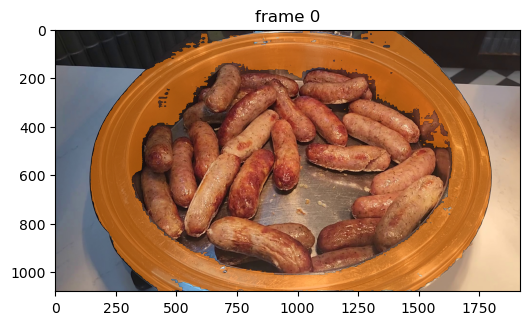

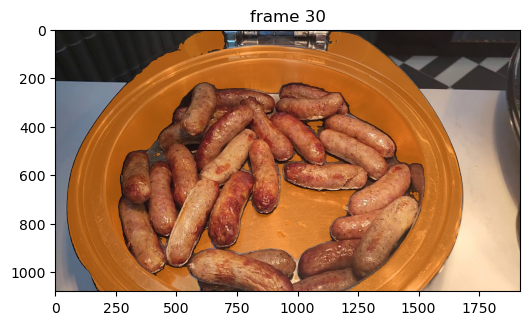

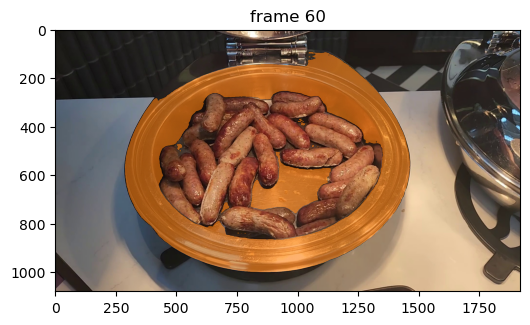

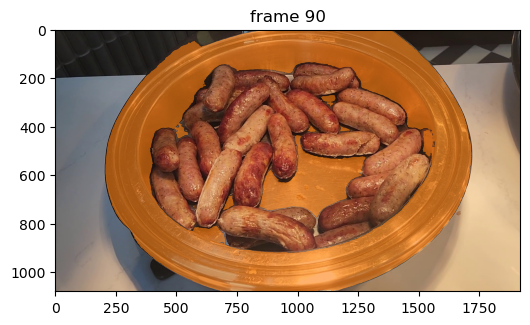

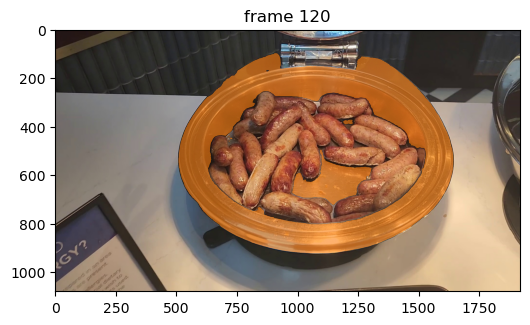

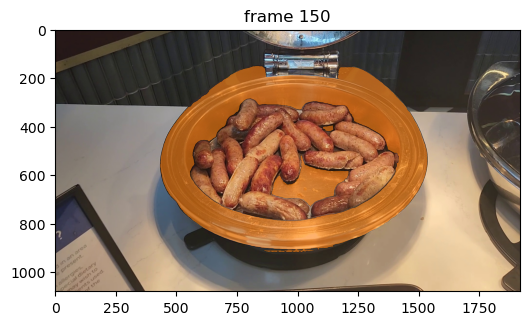

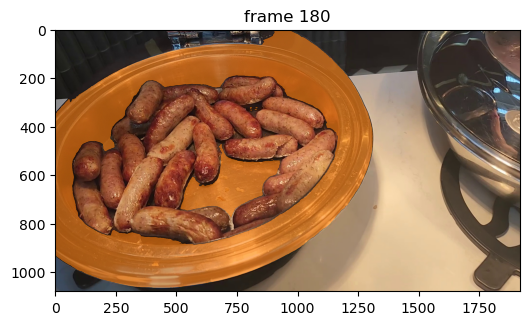

In [5]:
test_vp.predict_video()